In [1]:
import h5py
import numpy as np
import os,random
from tensorflow.keras.layers import Input,Reshape,ZeroPadding2D,MaxPool2D,Conv1D,Conv2D,Dropout,Flatten,Dense,Activation,MaxPooling2D,AlphaDropout
from tensorflow.keras import layers
import tensorflow.keras.models as Model
from tensorflow.keras.regularizers import *
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import tensorflow_addons as tfa

In [2]:
f = h5py.File(r'C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part0.h5')
sample_num = f['X'].shape[0]
# idx = np.random.choice(range(0,sample_num),size=3375)
idx = np.random.choice(range(0,sample_num),size=60000)
X = f['X'][:][idx]
Y = f['Y'][:][idx]
Z = f['Z'][:][idx]
f.close()

for i in range(1,24):
    if i%1 == 0:
        !free -m
    '''if i == 10:
        continue'''
    filename = r'C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part'+str(i) + '.h5'
    print(filename)
    f = h5py.File(filename,'r')
    X = np.vstack((X,f['X'][:][idx]))
    Y = np.vstack((Y,f['Y'][:][idx]))
    Z = np.vstack((Z,f['Z'][:][idx]))
    f.close()


print('X-size：',X.shape)
print('Y-size：',Y.shape)
print('Z-size：',Z.shape)

C:\Users\hutom\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  """Entry point for launching an IPython kernel.
'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part1.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part2.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part3.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part4.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part5.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part6.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part7.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part8.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part9.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part10.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part11.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part12.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part13.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part14.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part15.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part16.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part17.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part18.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part19.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part20.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part21.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part22.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part23.h5
X-size： (1440000, 1024, 2)
Y-size： (1440000, 24)
Z-size： (1440000, 1)


## Data preprocessing, and obtain training set and test set

In [12]:
n_examples = X.shape[0]
# n_train = int(n_examples * 0.9877) 
n_train = int(n_examples * 0.8)  
train_idx = np.random.choice(range(0,n_examples), size=n_train, replace=False)  #Randomly select training sample subscript
test_idx = list(set(range(0,n_examples))-set(train_idx)) #Test sample index


Z_train = Z[train_idx]
Z_train = Z_train.reshape((len(Z_train)))


train_idx_under=[] #trainidx for data with SNR <=0dB
train_idx_upper=[] #trainidx for data with SNR>0dB
for index, snr in enumerate(Z_train):
    if (snr<=0):
        train_idx_under.append(index)
    else:
        train_idx_upper.append(index)
random.shuffle(train_idx_under)
train_idx_under = np.array(train_idx_under)
random.shuffle(train_idx_upper)
train_idx_upper = np.array(train_idx_upper)

X_train_under = X[train_idx_under]  #training samples
Y_train_under = Y[train_idx_under]

X_train_upper = X[train_idx_upper]  #training samples
Y_train_upper = Y[train_idx_upper]

X_test =  X[test_idx]  #testing samples
Y_test = Y[test_idx]
print("X_train_under:",X_train_under.shape)
print("Y_train_under:",Y_train_under.shape)

print("X_train_upper:",X_train_upper.shape)
print("Y_train_upper:",Y_train_upper.shape)


print("X_test:",X_test.shape)
print("Y_test:",Y_test.shape)

X_train_under: (485838, 1024, 2)
Y_train_under: (485838, 24)
X_train_upper: (666162, 1024, 2)
Y_train_upper: (666162, 24)
X_test_under: (121314, 1024, 2)
Y_test_under: (121314, 24)
X_test_upper: (166686, 1024, 2)
Y_test_upper: (166686, 24)


In [4]:
classes = ['32PSK',
 '16APSK',
 '32QAM',
 'FM',
 'GMSK',
 '32APSK',
 'OQPSK',
 '8ASK',
 'BPSK',
 '8PSK',
 'AM-SSB-SC',
 '4ASK',
 '16PSK',
 '64APSK',
 '128QAM',
 '128APSK',
 'AM-DSB-SC',
 'AM-SSB-WC',
 '64QAM',
 'QPSK',
 '256QAM',
 'AM-DSB-WC',
 'OOK',
 '16QAM']

class MultiHeadSelfAttention(layers.Layer):
    def __init__(self, embed_dim, num_heads=8):
        super(MultiHeadSelfAttention, self).__init__()
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        if embed_dim % num_heads != 0:
            raise ValueError(
                f"embedding dimension = {embed_dim} should be divisible by number of heads = {num_heads}"
            )
        self.projection_dim = embed_dim // num_heads
        self.query_dense = layers.Dense(embed_dim)
        self.key_dense = layers.Dense(embed_dim)
        self.value_dense = layers.Dense(embed_dim)
        self.combine_heads = layers.Dense(embed_dim)

    def attention(self, query, key, value):
        score = tf.matmul(query, key, transpose_b=True)
        dim_key = tf.cast(tf.shape(key)[-1], tf.float32)
        scaled_score = score / tf.math.sqrt(dim_key)
        weights = tf.nn.softmax(scaled_score, axis=-1)
        output = tf.matmul(weights, value)
        return output, weights

    def separate_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.projection_dim))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, inputs):
        # x.shape = [batch_size, seq_len, embedding_dim]
        batch_size = tf.shape(inputs)[0]
        query = self.query_dense(inputs)  # (batch_size, seq_len, embed_dim)
        key = self.key_dense(inputs)  # (batch_size, seq_len, embed_dim)
        value = self.value_dense(inputs)  # (batch_size, seq_len, embed_dim)
        query = self.separate_heads(
            query, batch_size
        )  # (batch_size, num_heads, seq_len, projection_dim)
        key = self.separate_heads(
            key, batch_size
        )  # (batch_size, num_heads, seq_len, projection_dim)
        value = self.separate_heads(
            value, batch_size
        )  # (batch_size, num_heads, seq_len, projection_dim)
        attention, weights = self.attention(query, key, value)
        attention = tf.transpose(
            attention, perm=[0, 2, 1, 3]
        )  # (batch_size, seq_len, num_heads, projection_dim)
        concat_attention = tf.reshape(
            attention, (batch_size, -1, self.embed_dim)
        )  # (batch_size, seq_len, embed_dim)
        output = self.combine_heads(
            concat_attention
        )  # (batch_size, seq_len, embed_dim)
        return output
    
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.2):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadSelfAttention(embed_dim, num_heads)
        self.ffn = tf.keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)
    
def proposed_model(X_train,classes):

    embed_dim = 1024  # Embedding size for each token
    num_heads = 64  # Number of attention heads
    ff_dim = 512  # Hidden layer size in feed forward network inside transformer

#     inputs = layers.Input(shape=(maxlen,))
#     embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
#     x = embedding_layer(inputs)
    mirrored_strategy = tf.distribute.MirroredStrategy(devices=["/gpu:0","/gpu:1","/gpu:2"], cross_device_ops=tf.distribute.HierarchicalCopyAllReduce())
    with mirrored_strategy.scope():
        in_shp = X_train.shape[1:]   #Dimensions of each sample

        #input layer
        X_input = Input(in_shp)
        X = Reshape([2,1024], input_shape=in_shp)(X_input)

        transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
        x = transformer_block(X)
        x = layers.GlobalAveragePooling1D()(x)
        x = layers.Dropout(0.3)(x)
        x = layers.Dense(256, activation="relu")(x)
        x = layers.Dropout(0.2)(x)
        x = layers.Dense(128, activation="relu")(x)
        x = layers.Dropout(0.2)(x)
        x = layers.Dense(24, activation="softmax")(x)

#         X = Dense(len(classes))(x)
#         #SoftMax
#         X = Activation('softmax')(x)
        return tf.keras.models.Model(inputs=X_input, outputs=x)     
    
model = proposed_model(X_train_under,classes)    

model.compile(loss='categorical_crossentropy', optimizer=tfa.optimizers.LazyAdam(0.001),metrics=['accuracy'])

model.summary()

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2')
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1024, 2)]         0         
_________________________________________________________________
reshape (Reshape)            (None, 2, 1024)           0         
_________________________________________________________________
transformer_block (Transform (None, 2, 1024)           5252608   
_________________________________________________________________
global_average_pooling1d (Gl (None, 1024)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_______________________________________________________

In [5]:
# from tensorflow.keras.utils import plot_model
# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [6]:
%%time
# filepath = 'transformer_model.h5'
history = model.fit(X_train_under,
    Y_train_under,
    batch_size=1024,
    epochs=100,
    verbose=1,
#     validation_data=(X_test, Y_test),
    validation_split = 0.2,
    callbacks = [
#         tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto'),
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, mode='auto')
    ])

Epoch 1/100
Instructions for updating:
Use `tf.data.Iterator.get_next_as_optional()` instead.
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:0').
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:0').
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:0').
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost

380/380 [==============================] - 15s 39ms/step - loss: 0.8178 - accuracy: 0.7103 - val_loss: 3.9479 - val_accuracy: 0.4532
Epoch 85/100
380/380 [==============================] - 15s 39ms/step - loss: 0.8143 - accuracy: 0.7114 - val_loss: 3.9448 - val_accuracy: 0.4530
Epoch 86/100
380/380 [==============================] - 15s 39ms/step - loss: 0.8118 - accuracy: 0.7119 - val_loss: 3.8997 - val_accuracy: 0.4520
Epoch 87/100
380/380 [==============================] - 15s 39ms/step - loss: 0.8075 - accuracy: 0.7136 - val_loss: 3.9349 - val_accuracy: 0.4543
Epoch 88/100
380/380 [==============================] - 15s 39ms/step - loss: 0.8004 - accuracy: 0.7176 - val_loss: 3.9586 - val_accuracy: 0.4511
Epoch 89/100
380/380 [==============================] - 15s 39ms/step - loss: 0.7993 - accuracy: 0.7172 - val_loss: 4.0453 - val_accuracy: 0.4534
Epoch 90/100
380/380 [==============================] - 15s 39ms/step - loss: 0.7950 - accuracy: 0.7195 - val_loss: 3.9395 - val_accuracy

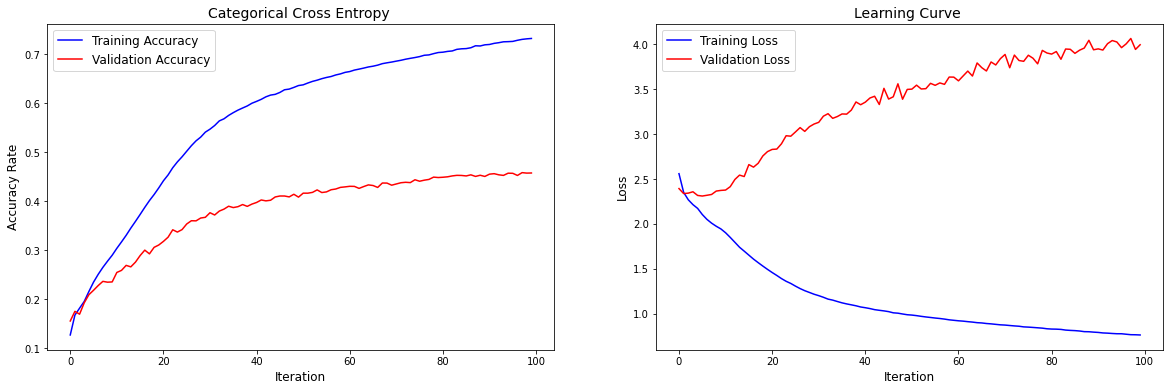

In [8]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2,figsize=(20,6))

ax1.plot(history.history['accuracy'],'b', history.history['val_accuracy'], 'r')
ax1.set_ylabel('Accuracy Rate',fontsize=12)
ax1.set_xlabel('Iteration',fontsize=12)
ax1.set_title('Categorical Cross Entropy ',fontsize=14)
ax1.legend(['Training Accuracy','Validation Accuracy'],fontsize=12,loc='best')

ax2.plot(history.history['loss'], 'b',history.history['val_loss'],'r')
ax2.set_ylabel('Loss',fontsize=12)
ax2.set_xlabel('Iteration',fontsize=12)
ax2.set_title('Learning Curve ',fontsize=14)
ax2.legend(['Training Loss','Validation Loss'],fontsize=12,loc='best')

# plt.savefig('crosse_results.png')
plt.show()

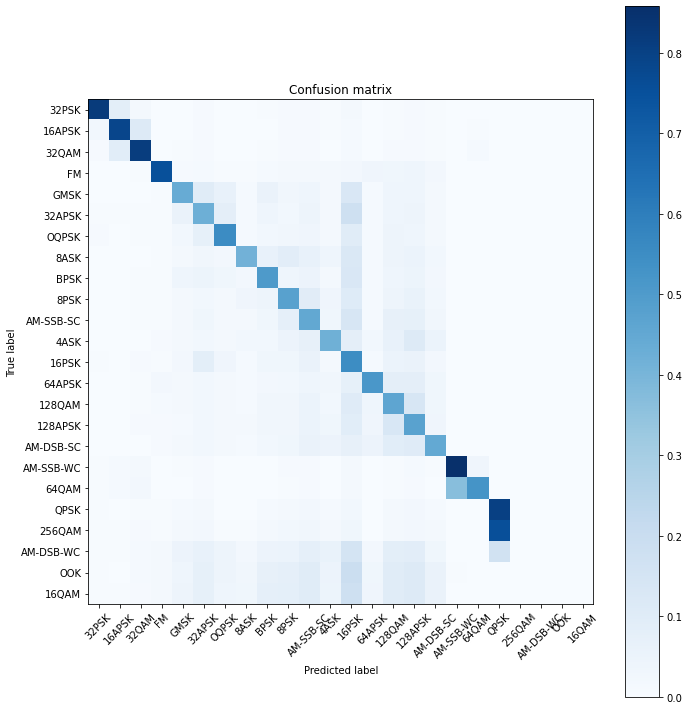

In [23]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=[]):
    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
# Plot confusion matrix
batch_size = 1024
test_Y_hat = model.predict(X_test, batch_size=3000)
conf = np.zeros([len(classes),len(classes)])
confnorm = np.zeros([len(classes),len(classes)])
for i in range(0,X_test.shape[0]):
    j = list(Y_test[i,:]).index(1)
    k = int(np.argmax(test_Y_hat[i,:]))
    conf[j,k] = conf[j,k] + 1
for i in range(0,len(classes)):
    confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
plot_confusion_matrix(confnorm, labels=classes)

In [24]:
for i in range(len(confnorm)):
    print(classes[i],confnorm[i,i])

32PSK 0.8186245696532034
16APSK 0.7844578412750847
32QAM 0.8119750519750519
FM 0.7520066889632107
GMSK 0.43810567118901156
32APSK 0.42439228834870074
OQPSK 0.5553706631167319
8ASK 0.4123132788644054
BPSK 0.503656914893617
8PSK 0.47751588097626213
AM-SSB-SC 0.4490488006617039
4ASK 0.42135164928347324
16PSK 0.5501386904261578
64APSK 0.5157753786927777
128QAM 0.46205430160287864
128APSK 0.4734275559963633
AM-DSB-SC 0.4469320066334992
AM-SSB-WC 0.8577695292728194
64QAM 0.5262325116588941
QPSK 0.8012629063913304
256QAM 0.0
AM-DSB-WC 0.0
OOK 0.0
16QAM 0.0


In [18]:
model2 = proposed_model(X_train_upper,classes)    
model2.compile(loss='categorical_crossentropy', optimizer=tfa.optimizers.LazyAdam(0.001),metrics=['accuracy'])
model.summary()

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2')
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1024, 2)]         0         
_________________________________________________________________
reshape (Reshape)            (None, 2, 1024)           0         
_________________________________________________________________
transformer_block (Transform (None, 2, 1024)           5252608   
_________________________________________________________________
global_average_pooling1d (Gl (None, 1024)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_______________________________________________________

In [19]:
%%time
# filepath = 'transformer_model.h5'
history2 = model2.fit(X_train_upper,
    Y_train_upper,
    batch_size=1024,
    epochs=100,
    verbose=1,
#     validation_data=(X_test, Y_test),
    validation_split = 0.2,
    callbacks = [
#         tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto'),
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, mode='auto')
    ])

Epoch 1/100
521/521 [==============================] - 21s 41ms/step - loss: 2.5116 - accuracy: 0.1345 - val_loss: 2.3534 - val_accuracy: 0.1696
Epoch 2/100
521/521 [==============================] - 20s 39ms/step - loss: 2.3205 - accuracy: 0.1732 - val_loss: 2.3064 - val_accuracy: 0.1776
Epoch 3/100
521/521 [==============================] - 20s 39ms/step - loss: 2.2451 - accuracy: 0.1876 - val_loss: 2.3010 - val_accuracy: 0.1870
Epoch 4/100
521/521 [==============================] - 20s 39ms/step - loss: 2.2041 - accuracy: 0.1967 - val_loss: 2.3164 - val_accuracy: 0.1914
Epoch 5/100
521/521 [==============================] - 20s 39ms/step - loss: 2.1791 - accuracy: 0.2065 - val_loss: 2.3184 - val_accuracy: 0.1993
Epoch 6/100
521/521 [==============================] - 20s 39ms/step - loss: 2.1627 - accuracy: 0.2165 - val_loss: 2.3188 - val_accuracy: 0.2114
Epoch 7/100
521/521 [==============================] - 20s 39ms/step - loss: 2.1302 - accuracy: 0.2361 - val_loss: 2.2701 - val_ac

# A model can overfit to cross entropy loss without over overfitting to accuracy.

There is a key difference between the two types of loss:
   Accuracy measures whether you get the prediction right
  Cross entropy measures how confident you are about a prediction
For example, if an image of a cat is passed into two models. Model A predicts {cat: 0.9, dog: 0.1} and model B predicts {cat: 0.6, dog: 0.4}. Both model will score the same accuracy, but model A will have a lower loss.
Because of this the model will try to be more and more confident to minimize loss. It works fine in training stage, but in validation stage it will perform poorly in term of loss. For example, for some borderline images, being confident e.g. {cat: 0.9, dog: 0.1} will give higher loss than being uncertain e.g. {cat: 0.6, dog: 0.4}
In short, cross entropy loss measures the calibration of a model. Mis-calibration is a common issue to modern neuronal networks. They tend to be over-confident. On Calibration of Modern Neural Networks talks about it in great details.

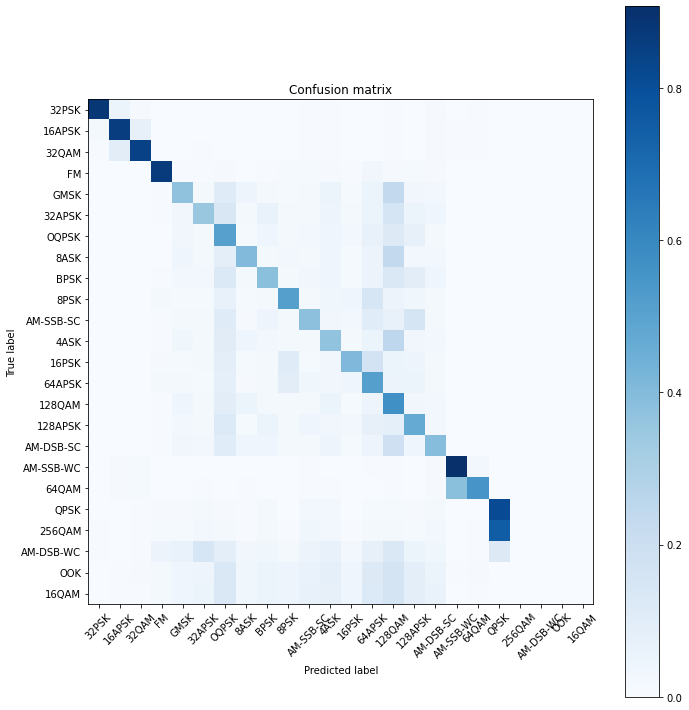

In [25]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=[]):
    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
# Plot confusion matrix
batch_size = 1024
test_Y_hat = model2.predict(X_test, batch_size=3000)
conf = np.zeros([len(classes),len(classes)])
confnorm = np.zeros([len(classes),len(classes)])
for i in range(0,X_test.shape[0]):
    j = list(Y_test[i,:]).index(1)
    k = int(np.argmax(test_Y_hat[i,:]))
    conf[j,k] = conf[j,k] + 1
for i in range(0,len(classes)):
    confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
plot_confusion_matrix(confnorm, labels=classes)

In [26]:
for i in range(len(confnorm)):
    print(classes[i],confnorm[i,i])

32PSK 0.881434209421446
16APSK 0.8552316458832273
32QAM 0.8454885654885654
FM 0.8667224080267558
GMSK 0.37094463638661834
32APSK 0.3490360435875943
OQPSK 0.5101921956901573
8ASK 0.4008417925229017
BPSK 0.3803191489361702
8PSK 0.5124540287529255
AM-SSB-SC 0.3759305210918114
4ASK 0.36750614771474605
16PSK 0.40875851054887785
64APSK 0.5135994643903256
128QAM 0.5723748773307163
128APSK 0.468303165550872
AM-DSB-SC 0.3927860696517413
AM-SSB-WC 0.9072886789269445
64QAM 0.5509660226515656
QPSK 0.8094547316323918
256QAM 0.0
AM-DSB-WC 0.0
OOK 0.0
16QAM 0.0


Overall Accuracy -20:  0.4726198997852541
Overall Accuracy -18:  0.4695077149155033
Overall Accuracy -16:  0.4773075881981413
Overall Accuracy -14:  0.46560706401766006
Overall Accuracy -12:  0.46815012892751406
Overall Accuracy -10:  0.4629112212708427
Overall Accuracy -8:  0.4754462303525442
Overall Accuracy -6:  0.4673923069827507
Overall Accuracy -4:  0.46834298118668594
Overall Accuracy -2:  0.4753164556962025


C:\Users\hutom\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Overall Accuracy 0:  0.4754928558509676
Overall Accuracy 2:  0.4690640848317197
Overall Accuracy 4:  0.47436933297423467
Overall Accuracy 6:  0.47102241662110444
Overall Accuracy 8:  0.47318379027046986
Overall Accuracy 10:  0.4737261146496815
Overall Accuracy 12:  0.4700468985045571
Overall Accuracy 14:  0.47145641882483985
Overall Accuracy 16:  0.46982874562897875
Overall Accuracy 18:  0.4722865799322759
Overall Accuracy 20:  0.46685357691959845
Overall Accuracy 22:  0.4719019518837948
Overall Accuracy 24:  0.48357890999467423
Overall Accuracy 26:  0.48062224620088123
Overall Accuracy 28:  0.4711942989611059
Overall Accuracy 30:  0.4606741573033708


<Figure size 432x288 with 0 Axes>

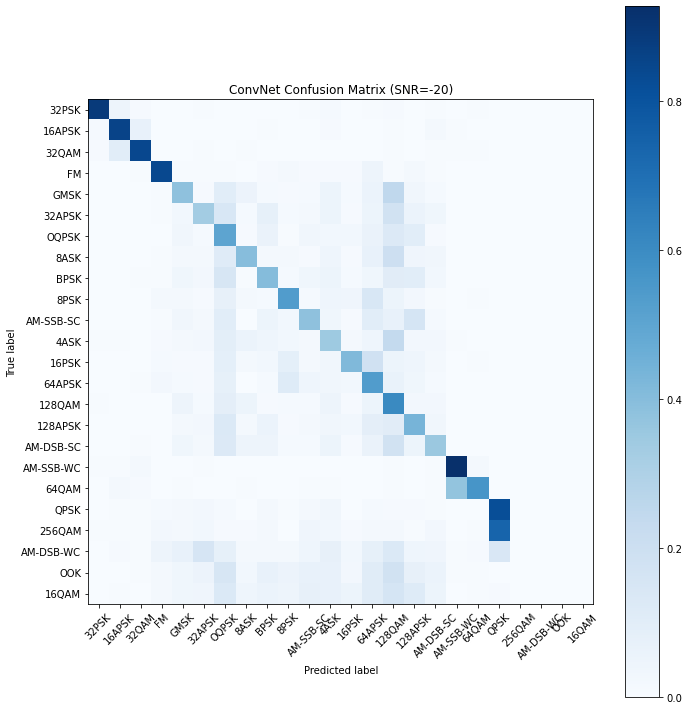

<Figure size 432x288 with 0 Axes>

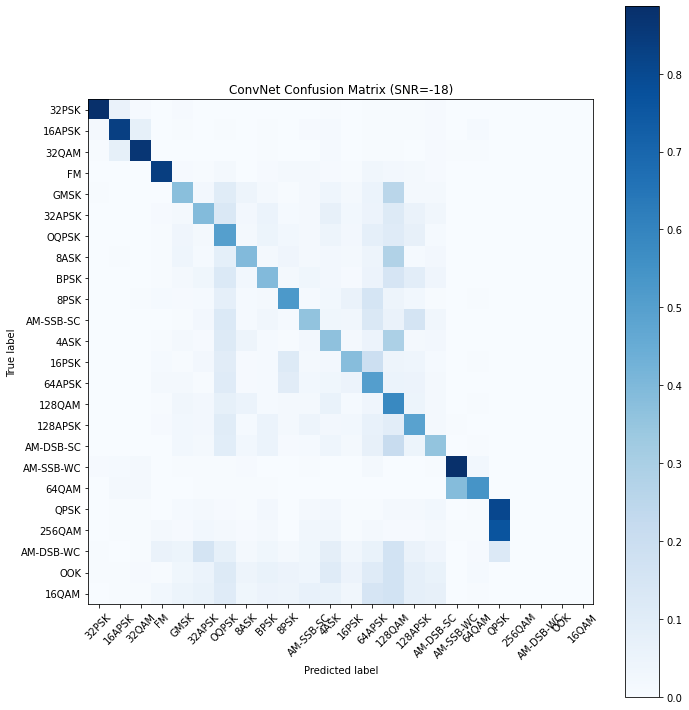

<Figure size 432x288 with 0 Axes>

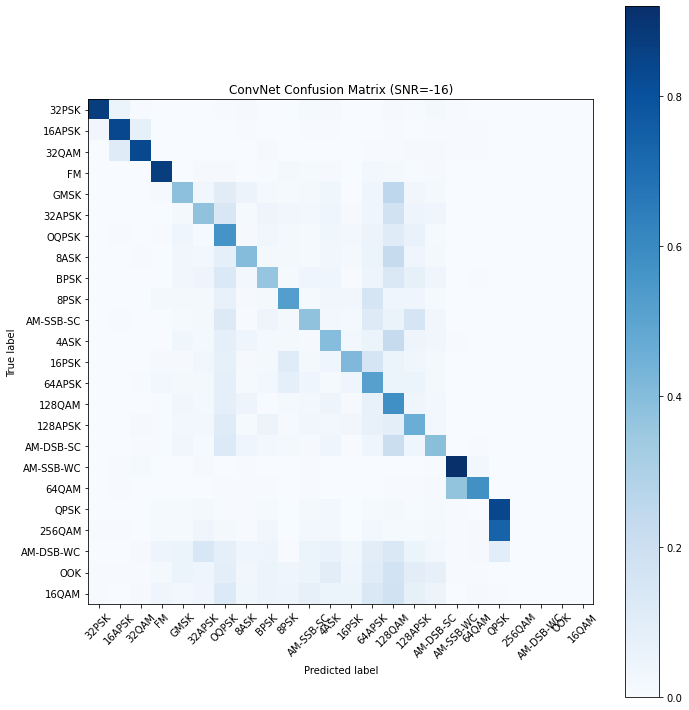

<Figure size 432x288 with 0 Axes>

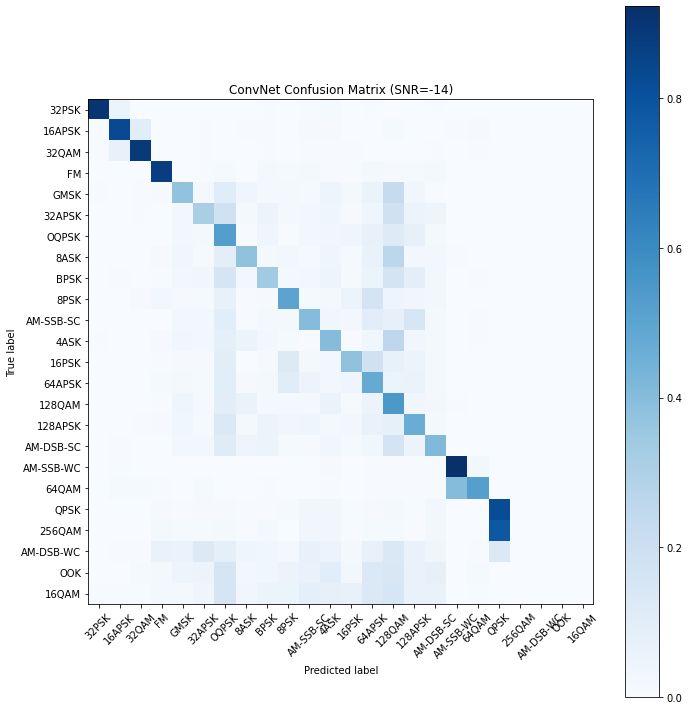

<Figure size 432x288 with 0 Axes>

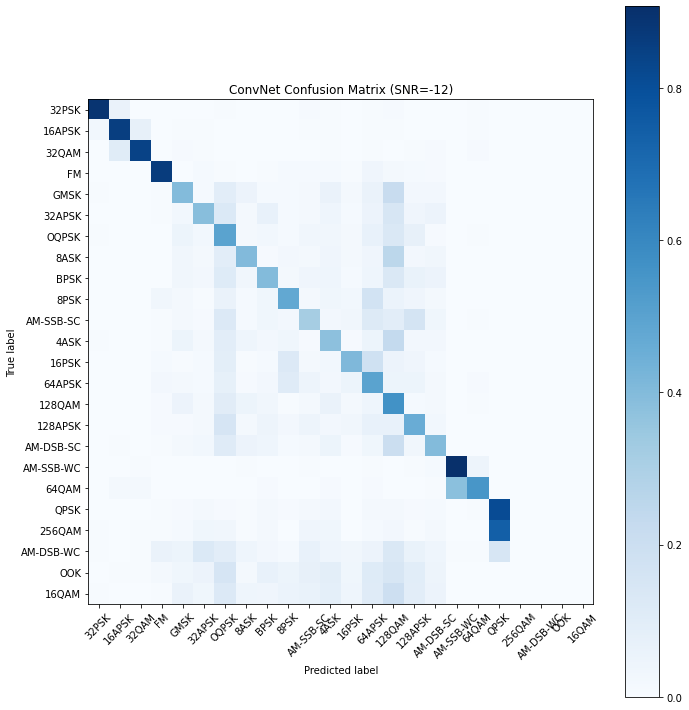

<Figure size 432x288 with 0 Axes>

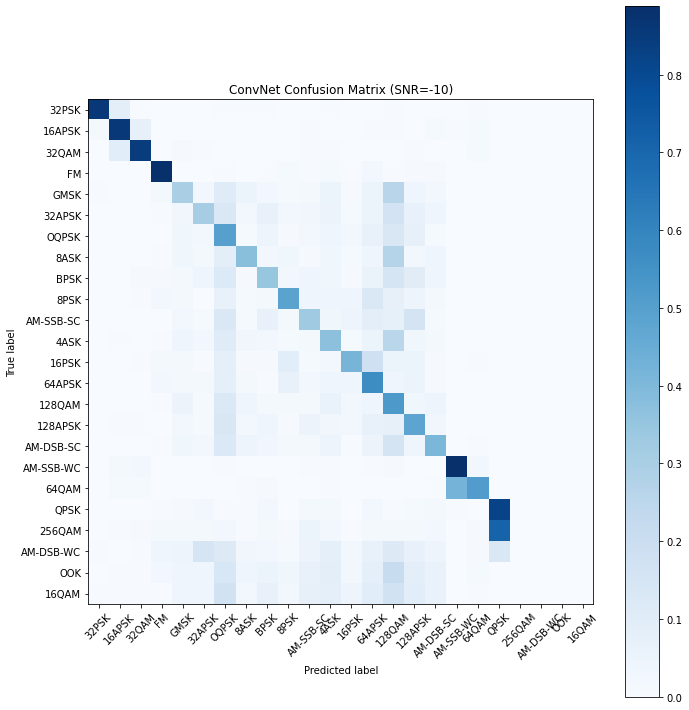

<Figure size 432x288 with 0 Axes>

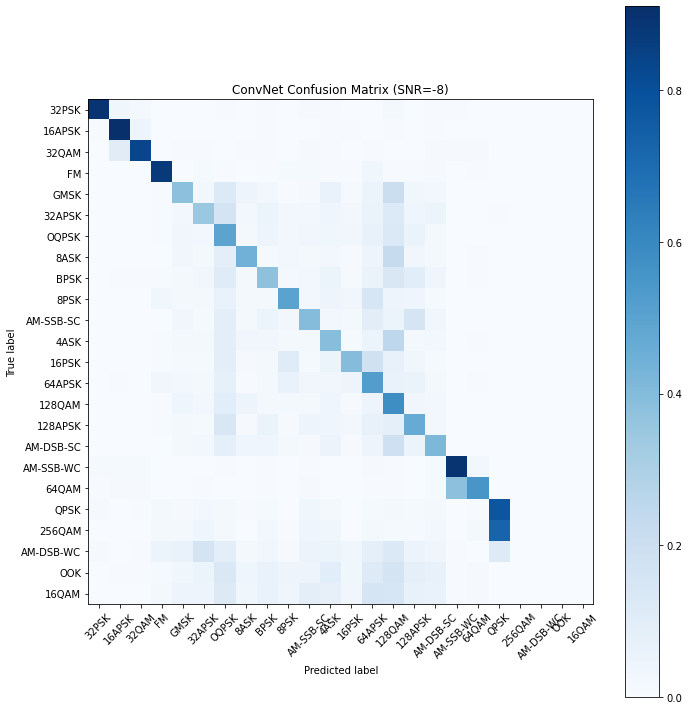

<Figure size 432x288 with 0 Axes>

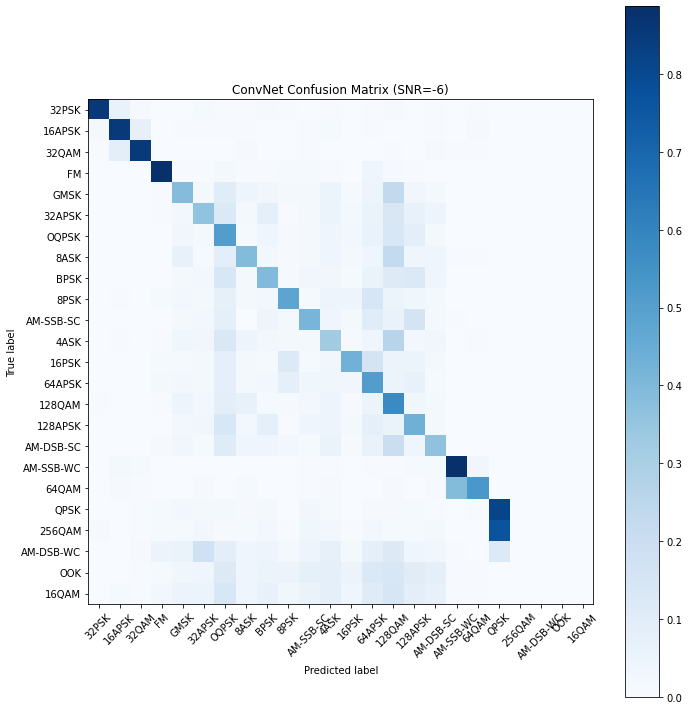

<Figure size 432x288 with 0 Axes>

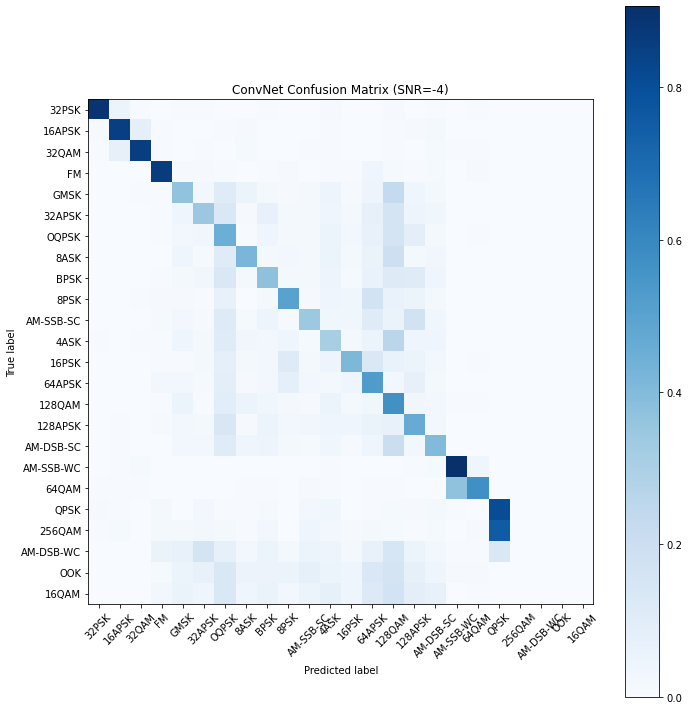

<Figure size 432x288 with 0 Axes>

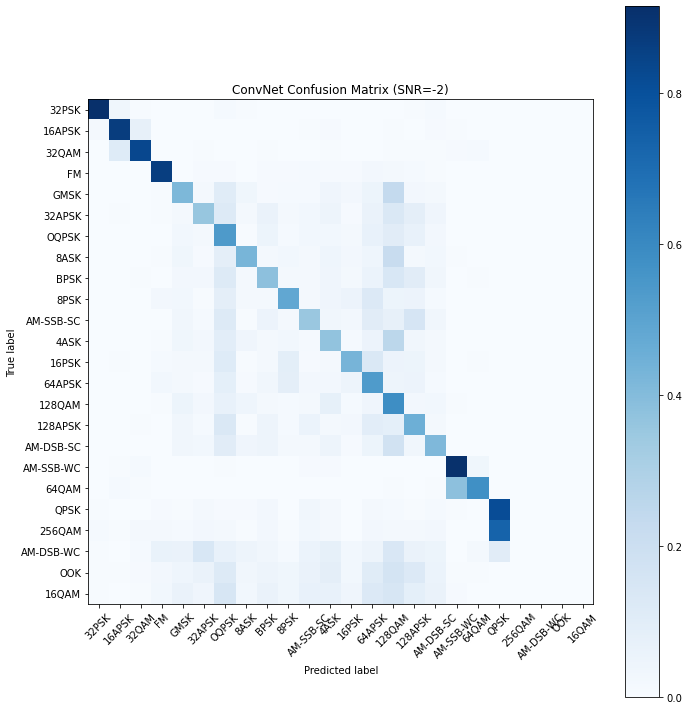

<Figure size 432x288 with 0 Axes>

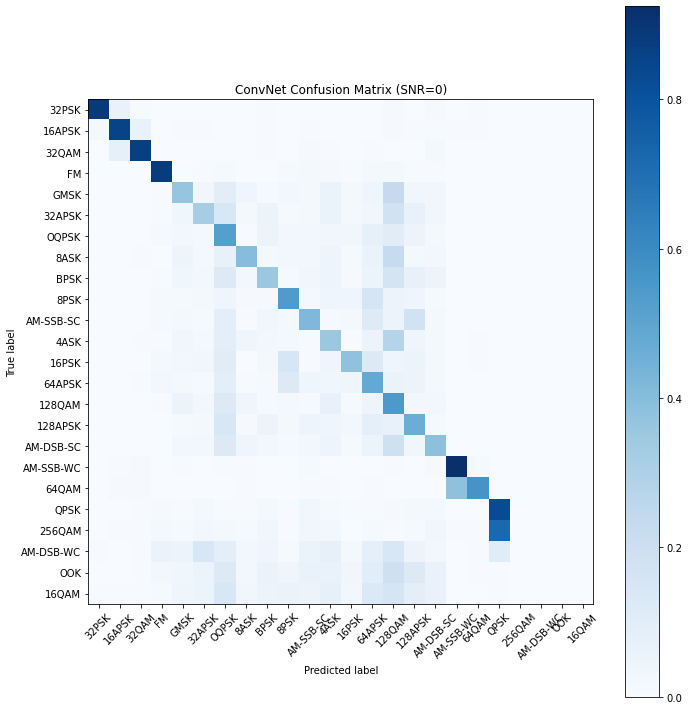

<Figure size 432x288 with 0 Axes>

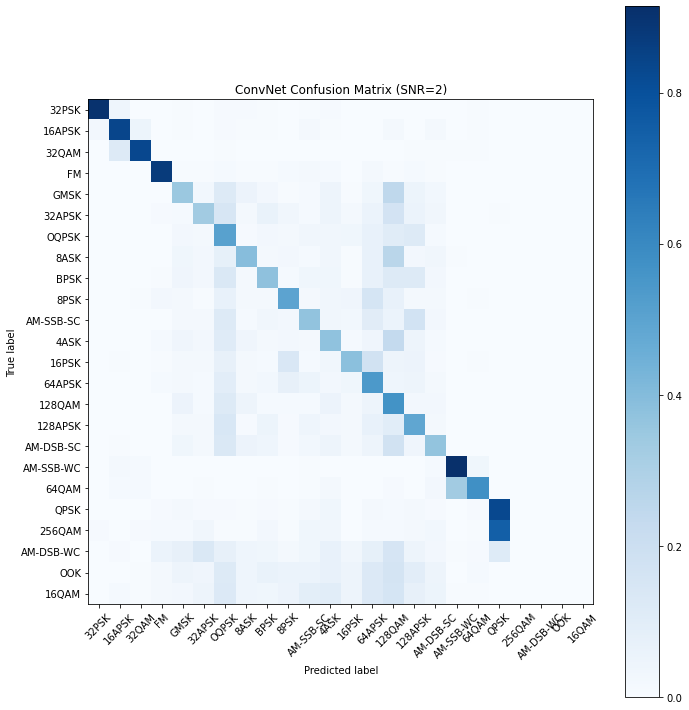

<Figure size 432x288 with 0 Axes>

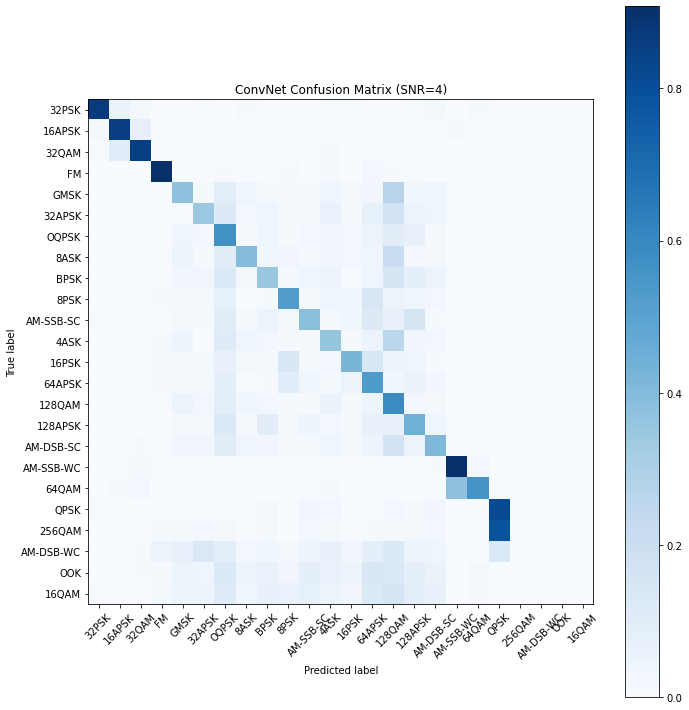

<Figure size 432x288 with 0 Axes>

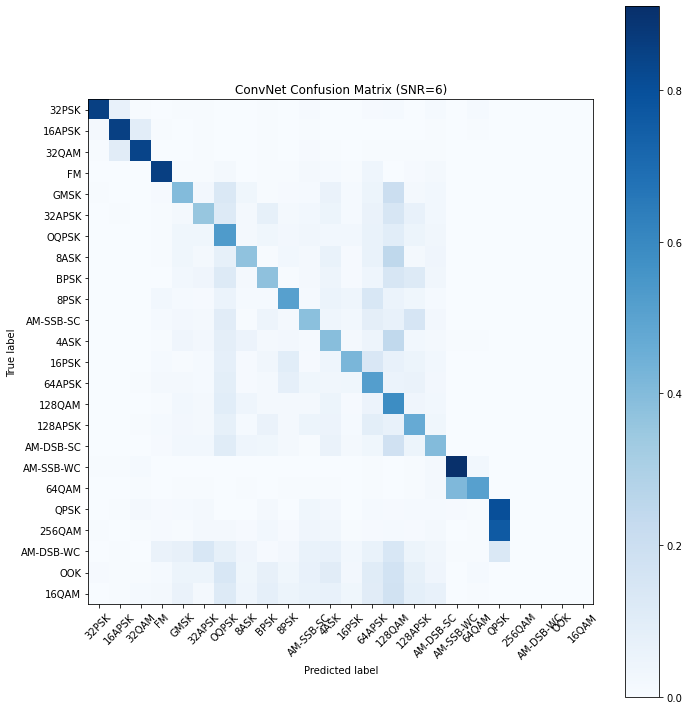

<Figure size 432x288 with 0 Axes>

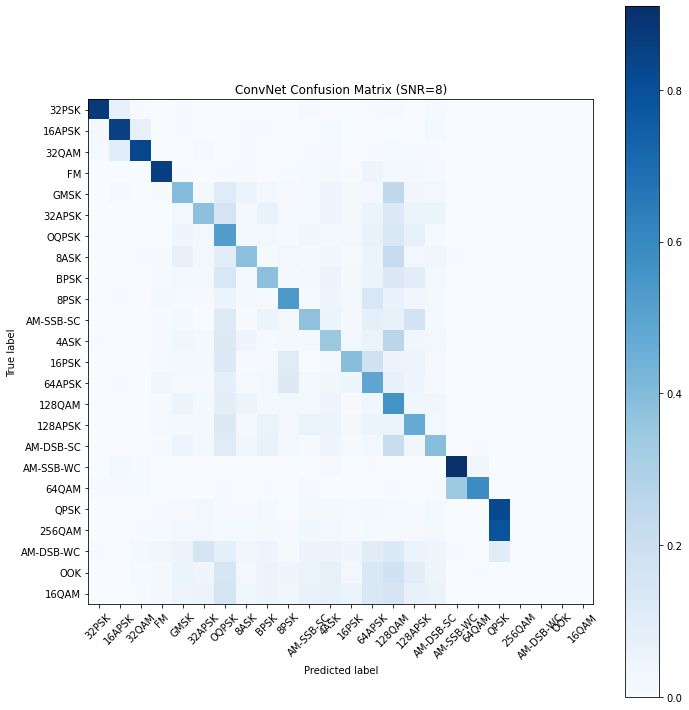

<Figure size 432x288 with 0 Axes>

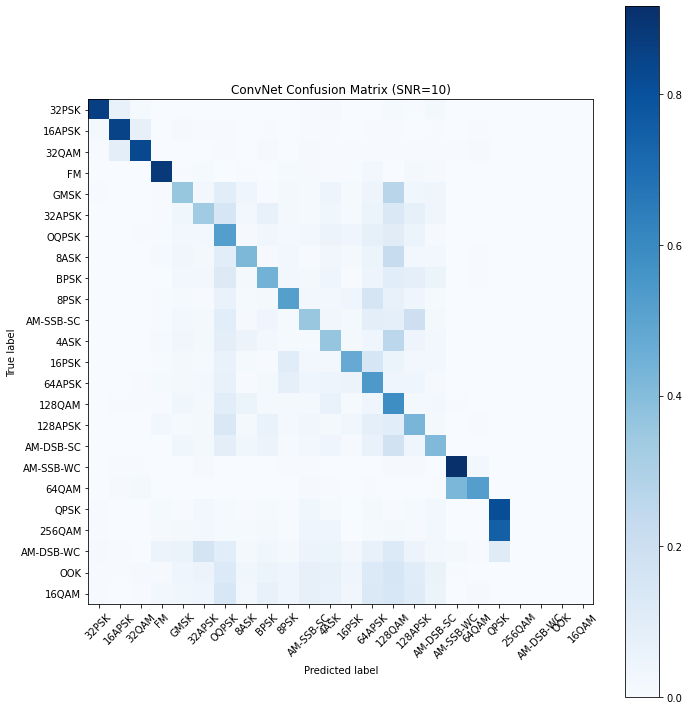

<Figure size 432x288 with 0 Axes>

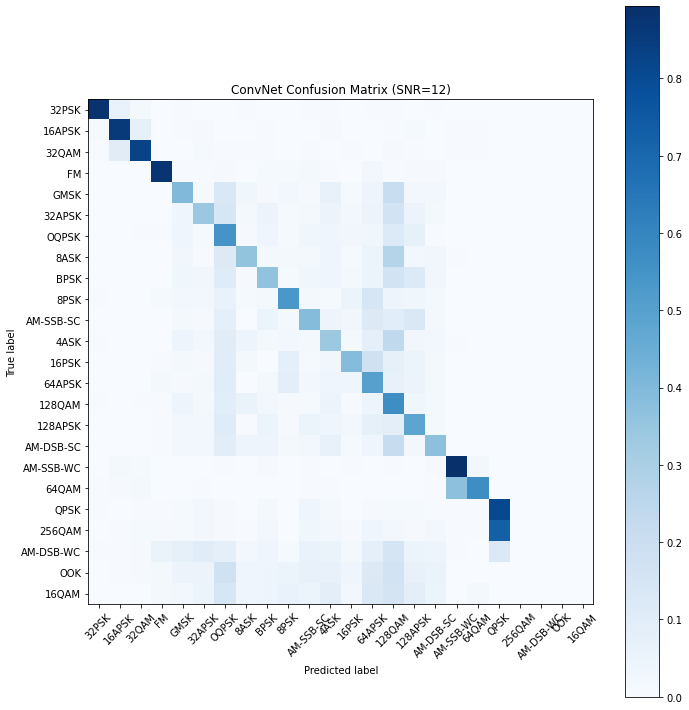

<Figure size 432x288 with 0 Axes>

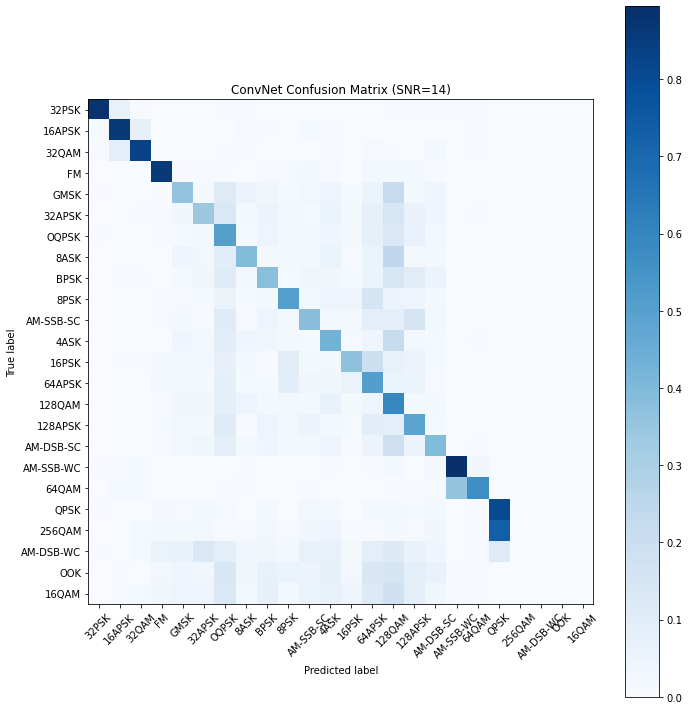

<Figure size 432x288 with 0 Axes>

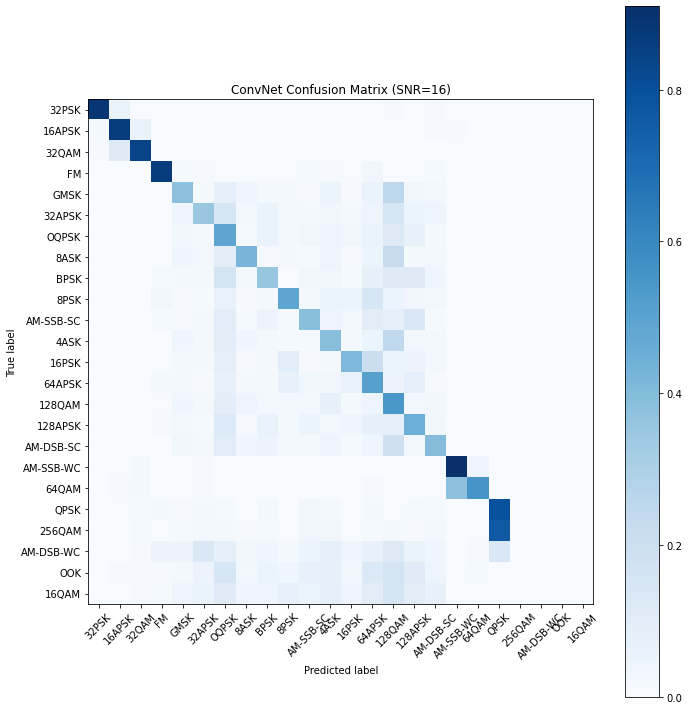

<Figure size 432x288 with 0 Axes>

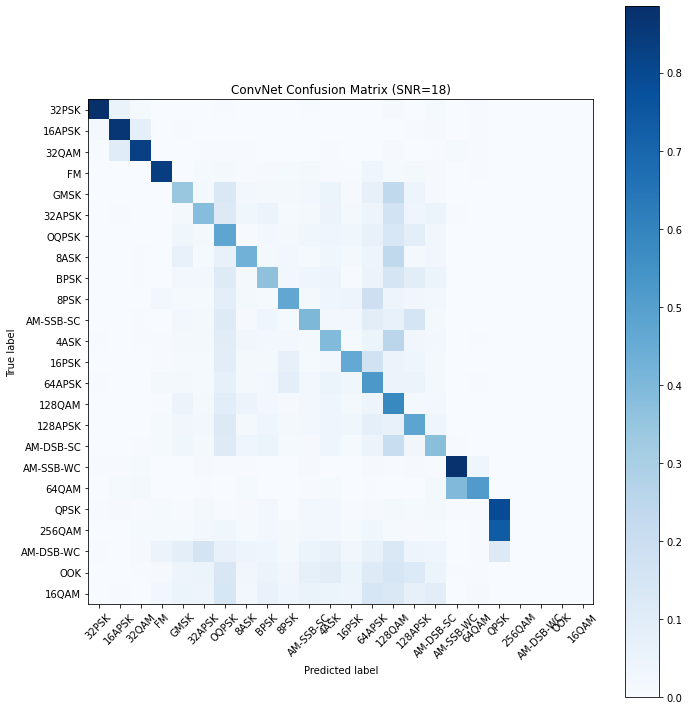

<Figure size 432x288 with 0 Axes>

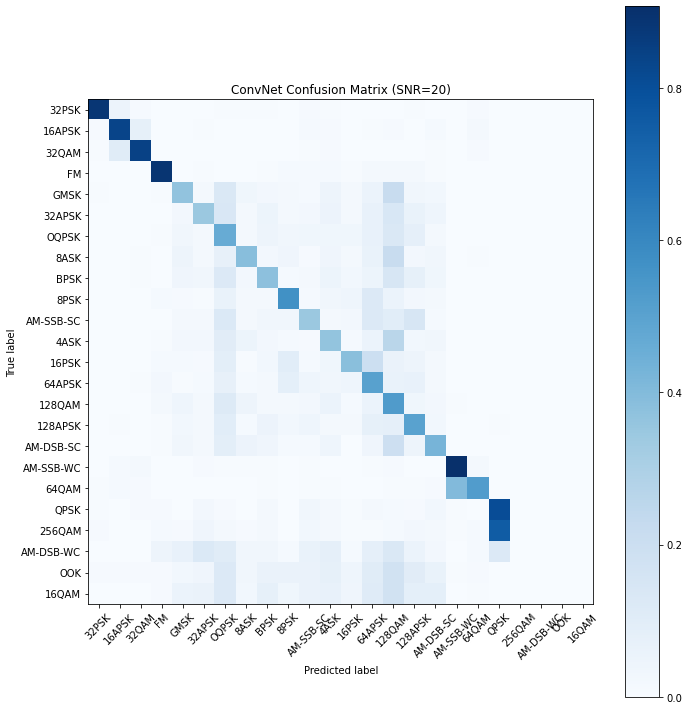

<Figure size 432x288 with 0 Axes>

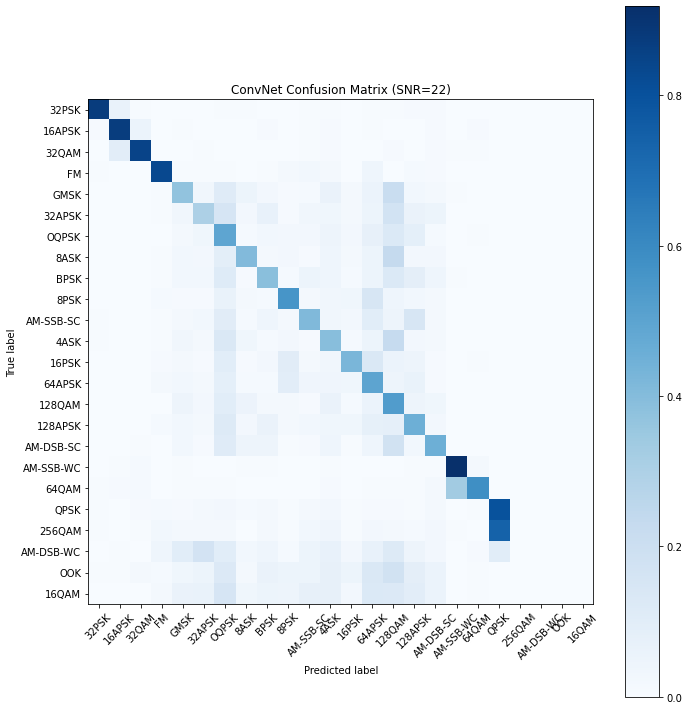

<Figure size 432x288 with 0 Axes>

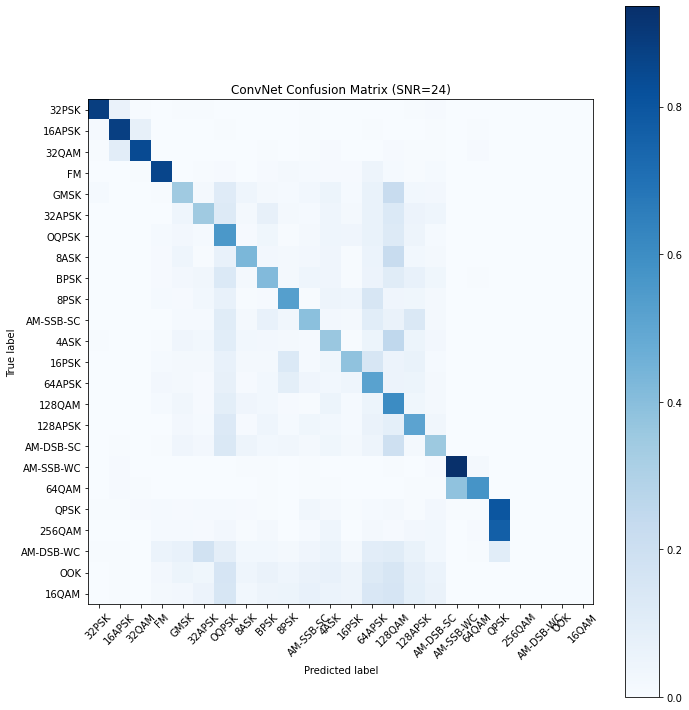

<Figure size 432x288 with 0 Axes>

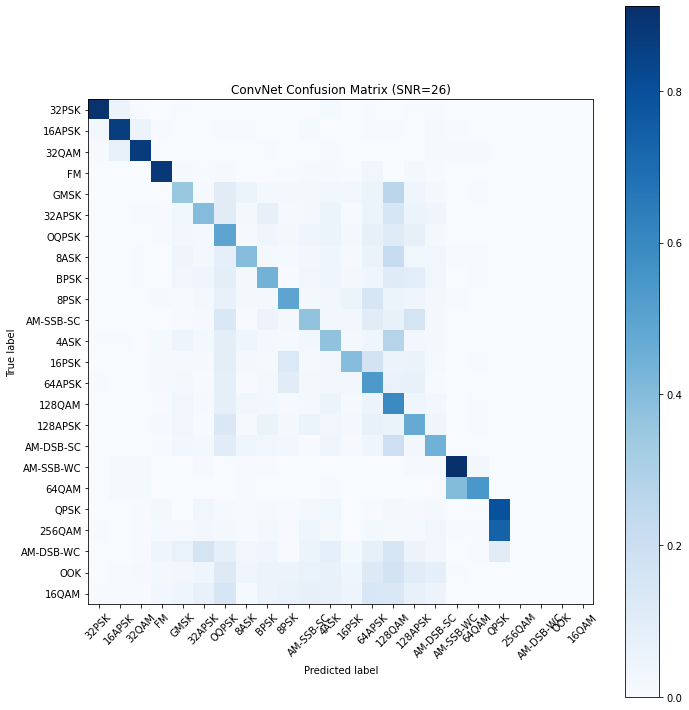

<Figure size 432x288 with 0 Axes>

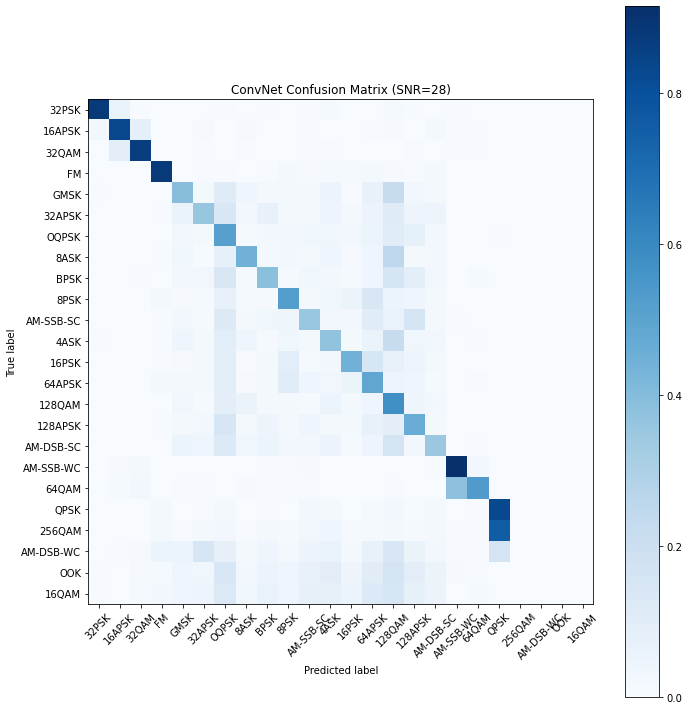

<Figure size 432x288 with 0 Axes>

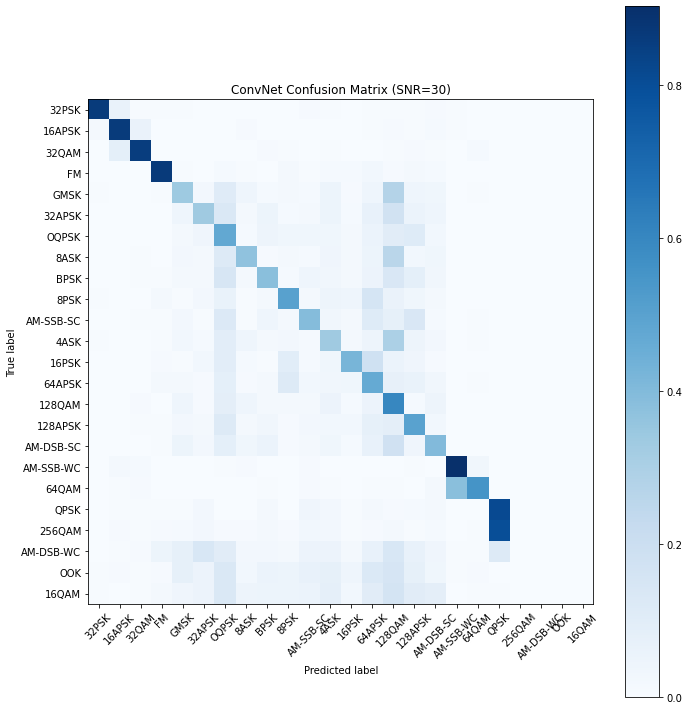

In [30]:

acc={}
# Z_test = Z[test_idx]
# Z_test = Z_test.reshape((len(Z_test)))
SNRs = np.unique(Z_test)
for snr in SNRs:
    X_test_snr = X_test[Z_test==snr]
    Y_test_snr = Y_test[Z_test==snr]
#     if (snr<=0):      
#         pre_Y_test = model.predict(X_test_snr)
#     else:
#         pre_Y_test = model2.predict(X_test_snr)

    pre_Y_test = model2.predict(X_test_snr)

    conf = np.zeros([len(classes),len(classes)])
    confnorm = np.zeros([len(classes),len(classes)])
    for i in range(0,X_test_snr.shape[0]):    #该信噪比下测试数据量
        j = list(Y_test_snr[i,:]).index(1)   #正确类别下标
        k = int(np.argmax(pre_Y_test[i,:])) #预测类别下标
        conf[j,k] = conf[j,k] + 1
    for i in range(0,len(classes)):
        confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
   
    plt.figure()
    plot_confusion_matrix(confnorm, labels=classes, title="ConvNet Confusion Matrix (SNR=%d)"%(snr))
    
    cor = np.sum(np.diag(conf))
    ncor = np.sum(conf) - cor
    print ("Overall Accuracy %s: "%snr, cor / (cor+ncor))
    acc[snr] = 1.0*cor/(cor+ncor)

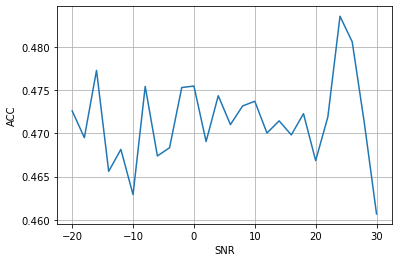

In [31]:

plt.plot(acc.keys(),acc.values())
plt.ylabel('ACC')
plt.xlabel('SNR')
plt.grid(True)
plt.show()

In [ ]:
X_test=X[train_idx]
